In [20]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import preprocessing
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [17]:
data_filename = "../DataSet/Kmeans/"+"part_data_uiclfc"+".csv"
data_set_uiclfc = pd.read_csv(data_filename)
data_set_uiclfc.columns

Index(['27', '0', '0.1', '3', '30', '0.1.1', '3.0', '27.1', '0.2', '0.3',
       ...
       '0.14', '1.7', '6.2', '2.5', '1.8', '57.0.2', '0.0.6', '0.0.7', '0.0.8',
       '7'],
      dtype='object', length=112)

In [21]:
def valid_train_set_construct(valid_ratio = 0.1, train_np_ratio = 50):
    '''
    # generation of train set
    @param valid_ratio: float ~ [0~1], the valid set ratio in total set and the rest is train set
    @param valid_sub_ratio: float ~ (0~1), random sample ratio of valid set
    @param train_np_ratio:(1~1200), the sub-sample ratio of training set for N/P balanced.
    @param train_sub_ratio: float ~ (0~1), random sample ratio of train set after N/P subsample
    
    @return valid_X, valid_y, train_X, train_y
    '''
    #train_data_filename = "../DataSet/"+"part_data_uiclfk2014-12-18"+".csv"
    data_filename = "../DataSet/Kmeans/"+"part_data_uiclfc"+".csv"

    data_set_uiclfc = pd.read_csv(data_filename,index_col = False, names=[
        'u_b1_count_x','u_b2_count_x','u_b3_count_x','u_b4_count_x','u_b_count_x','u_b4_rate_x','u_b4_diff_hours_x',
        'u_b1_count_y','u_b2_count_y','u_b3_count_y','u_b4_count_y','u_b_count_y','u_b4_rate_y','u_b4_diff_hours_y',
        'u_b1_count','u_b2_count','u_b3_count','u_b4_count','u_b_count','u_b4_rate','u_b4_diff_hours',
        'i_b1_count_x','i_b2_count_x','i_b3_count_x','i_b4_count_x','i_b_count_x','i_b4_rate_x','i_user_num_x','i_b4_diff_hours_x',
        'i_b1_count_y','i_b2_count_y','i_b3_count_y','i_b4_count_y','i_b_count_y','i_b4_rate_y','i_user_num_y','i_b4_diff_hours_y',
        'i_b1_count','i_b2_count','i_b3_count','i_b4_count','i_b_count','i_b4_rate','i_user_num','i_b4_diff_hours',
        'c_b1_count_x','c_b2_count_x','c_b3_count_x','c_b4_count_x','c_b_count_x','c_b4_rate_x','c_user_num_x','c_b4_diff_hours_x',
        'c_b1_count_y','c_b2_count_y','c_b3_count_y','c_b4_count_y','c_b_count_y','c_b4_rate_y','c_user_num_y','c_b4_diff_hours_y',                                                                              
        'c_b1_count','c_b2_count','c_b3_count','c_b4_count','c_b_count','c_b4_rate','c_user_num','c_b4_diff_hours',
        'ic_u_rank_in_c_x','ic_b_rank_in_c_x','ic_b4_rank_in_c_x',
        'ic_u_rank_in_c_y','ic_b_rank_in_c_y','ic_b4_rank_in_c_y',
        'ic_u_rank_in_c','ic_b_rank_in_c','ic_b4_rank_in_c',
        'ui_b1_count_x','ui_b2_count_x','ui_b3_count_x','ui_b4_count_x','ui_b_count_x','ui_b_count_rank_in_u_x','ui_b_count_rank_in_uc_x',
        'ui_b1_last_hours_x','ui_b2_last_hours_x','ui_b3_last_hours_x','ui_b4_last_hours_x',
        'ui_b1_count_y','ui_b2_count_y','ui_b3_count_y','ui_b4_count_y','ui_b_count_y','ui_b_count_rank_in_u_y','ui_b_count_rank_in_uc_y',
        'ui_b1_last_hours_y','ui_b2_last_hours_y','ui_b3_last_hours_y','ui_b4_last_hours_y',
        'ui_b1_count','ui_b2_count','ui_b3_count','ui_b4_count','ui_b_count','ui_b_count_rank_in_u','ui_b_count_rank_in_uc',
        'ui_b1_last_hours','ui_b2_last_hours','ui_b3_last_hours','ui_b4_last_hours',
        'uc_b1_count_x','uc_b2_count_x','uc_b3_count_x','uc_b4_count_x','uc_b_count_x','uc_b_count_rank_in_u_x','uc_b1_last_hours_x','uc_b2_last_hours_x','uc_b3_last_hours_x','uc_b4_last_hours_x',
        'uc_b1_count_y','uc_b2_count_y','uc_b3_count_y','uc_b4_count_y','uc_b_count_y','uc_b_count_rank_in_u_y','uc_b1_last_hours_y','uc_b2_last_hours_y','uc_b3_last_hours_x','uc_b4_last_hours_y',
        'uc_b1_count','uc_b2_count','uc_b3_count','uc_b4_count','uc_b_count','uc_b_count_rank_in_u','uc_b1_last_hours','uc_b2_last_hours','uc_b3_last_hours','uc_b4_last_hours', 
        'class'])  
    msk = np.random.rand(len(data_set_uiclfc)) <= valid_ratio
        
    valid_data_set_uiclfc = data_set_uiclfc.loc[msk]
    train_data_set_uiclfc = data_set_uiclfc.loc[~msk]
    
    train_data_set_uiclfc_label_1 = train_data_set_uiclfc[train_data_set_uiclfc['class'] == 0]
    train_data_set_uiclfc_np = train_data_set_uiclfc_label_1
    for i in range(1,1001,1):
        train_data_set_uiclfc_label_0_i = train_data_set_uiclfc[train_data_set_uiclfc['class'] == i]
        if len(train_data_set_uiclfc_label_0_i) != 0:
            train_data_set_uiclfc_label_0_i = train_data_set_uiclfc_label_0_i.sample(frac = train_np_ratio/1200)
            train_data_set_uiclfc_np     = pd.concat([train_data_set_uiclfc_np, train_data_set_uiclfc_label_0_i])
            
    train_data_set_uiclfc_np['class'] = (train_data_set_uiclfc_np['class']>0).astype('int')    #这不是将正负样例都变成正样例了吗？ 没有问题！！！
    train_data_set_uiclfc_np['class'] = (train_data_set_uiclfc_np['class']<1).astype('int')
    train_data_set_uiclfc_np.rename(columns={"class":"label"},inplace=True) 
    print("train_data_set_uiclfc_np shape:",train_data_set_uiclfc_np.shape,"np_ratio:",train_np_ratio)
    print("train data label=1:",train_data_set_uiclfc_np[train_data_set_uiclfc_np.label==1].shape)
    print("train data label=0:",train_data_set_uiclfc_np[train_data_set_uiclfc_np.label==0].shape)
    
    valid_data_set_uiclfc['class'] = (valid_data_set_uiclfc['class']>0).astype('int')    #这不是将正负样例都变成正样例了吗？ 没有问题！！！
    valid_data_set_uiclfc['class'] = (valid_data_set_uiclfc['class']<1).astype('int')
    valid_data_set_uiclfc.rename(columns={"class":"label"},inplace=True) 
    print("valid_data_set_uiclfc  shape:",valid_data_set_uiclfc.shape)
    print("valid data label=1:",valid_data_set_uiclfc[valid_data_set_uiclfc.label==1].shape)
    print("valid data label=0:",valid_data_set_uiclfc[valid_data_set_uiclfc.label==0].shape)
    
    '''    
    msk = np.random.rand(len(data_set_uiclfc_np)) <= valid_ratio
        
    valid_data_set_uiclfc = data_set_uiclfc_np.loc[msk]
    train_data_set_uiclfc = data_set_uiclfc_np.loc[~msk]
    #valid_data_set_uiclfc_label_1 = valid_data_set_uiclfc[ valid_data_set_uiclfc['class'] == 0 ].sample(frac = valid_sub_ratio)'''

    #construct valid set
    valid_X = valid_data_set_uiclfc.iloc[:,:-1]
    scaler = preprocessing.StandardScaler()
    scaler.fit(valid_X.values)
    valid_X_values = scaler.transform(valid_X.values)
    valid_X = pd.DataFrame(valid_X_values)
    
    valid_y = pd.DataFrame(valid_data_set_uiclfc['label'])
    
    
    #construct train set
    train_X = train_data_set_uiclfc_np.iloc[:,:-1]
    scaler = preprocessing.StandardScaler()
    scaler.fit(train_X.values)
    train_X_values = scaler.transform(train_X.values)
    train_X = pd.DataFrame(train_X_values)
    train_y = pd.DataFrame(train_data_set_uiclfc_np['label'])
    '''print(train_X.head(5),train_X.shape)
    print(train_y.head(5),train_y.shape)
    print('test')'''
    print("train and valid data is generated.")
    
    return valid_X, valid_y, train_X, train_y


In [22]:
valid_X, valid_y, train_X, train_y = valid_train_set_construct(0.1, 60)

/Users/sangyongjia/anaconda3/lib/python3.7/site-packages/pandas/io/parsers.py:678: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


train_data_set_uiclfc_np shape: (161268, 142) np_ratio: 60
train data label=1: (2579, 142)
train data label=0: (158689, 142)


/Users/sangyongjia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/sangyongjia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/sangyongjia/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus

valid_data_set_uiclfc  shape: (353950, 142)
valid data label=1: (304, 142)
valid data label=0: (353646, 142)
train and valid data is generated.


In [27]:
type(valid_X)

pandas.core.frame.DataFrame

In [39]:
# (1) selection for best N/P ratio of subsample
# generation of gbdt model
modle_gbdt = GradientBoostingClassifier(max_depth=12, 
                                                                  min_samples_leaf=10, 
                                                                  learning_rate=0.05, 
                                                                  n_estimators=150,  
                                                                  subsample=0.8, 
                                                                  max_features="sqrt",
                                                                  verbose=0,
                                                                  n_iter_no_change=50,
                                                                  tol=1e-4)
    
f1_scores = []
precision_score = []
recall = []
np_ratios = []
#np_ratio_list = [1,5,10,15,20,25,30,35,40,45,50,60,70,80,90,100,120,150,200,300]
np_ratio_list = [1,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80]
#np_ratio_list = [60,]
for np_ratio in np_ratio_list:
    t1 = time.time()
    # generation of training and valid set
    valid_X, valid_y, train_X, train_y = valid_train_set_construct(0.1, np_ratio)
    
    modle_gbdt.fit(train_X, train_y)
    
    # validation and evaluation
    valid_y_pred = modle_gbdt.predict(valid_X)
    
    
    f1_scores.append(metrics.f1_score(valid_y, valid_y_pred))
    precision_score.append(metrics.precision_score(valid_y, valid_y_pred))
    recall.append(metrics.recall_score(valid_y, valid_y_pred))
    np_ratios.append(np_ratio)
    
    print('modle_gbdt [NP ratio = %d] is fitted' % np_ratio)
    t2 = time.time() 
    print('time used %d s' % (t2-t1))
print('finished')

/Users/sangyongjia/anaconda3/lib/python3.7/site-packages/pandas/io/parsers.py:678: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


train_data_set_uiclfc_np shape: (9344, 142) np_ratio: 1
train data label=1: (4577, 142)
train data label=0: (4767, 142)


/Users/sangyongjia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/sangyongjia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/sangyongjia/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus

valid_data_set_uiclfc  shape: (636620, 142)
valid data label=1: (543, 142)
valid data label=0: (636077, 142)
train and valid data is generated.
      Iter       Train Loss      OOB Improve   Remaining Time 
         1           1.3302           0.0461            5.38s
         2           1.2808           0.0441            5.27s
         3           1.2333           0.0391            5.38s
         4           1.1911           0.0337            5.41s
         5           1.1510           0.0327            5.30s
         6           1.1140           0.0297            5.30s
         7           1.0788           0.0276            5.23s
         8           1.0408           0.0226            5.32s
         9           1.0162           0.0232            5.27s
        10           0.9860           0.0228            5.29s
        20           0.7741           0.0105            4.94s
        30           0.6399           0.0047            4.48s
        40           0.5435           0.0018     

/Users/sangyongjia/anaconda3/lib/python3.7/site-packages/pandas/io/parsers.py:678: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


train_data_set_uiclfc_np shape: (28450, 142) np_ratio: 5
train data label=1: (4609, 142)
train data label=0: (23841, 142)


/Users/sangyongjia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/sangyongjia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/sangyongjia/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus

valid_data_set_uiclfc  shape: (636390, 142)
valid data label=1: (511, 142)
valid data label=0: (635879, 142)
train and valid data is generated.
      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.8385           0.0416           24.11s
         2           0.7986           0.0342           21.81s
         3           0.7622           0.0279           21.04s
         4           0.7246           0.0239           20.08s
         5           0.7021           0.0217           20.16s
         6           0.6772           0.0180           20.19s
         7           0.6565           0.0167           19.86s
         8           0.6316           0.0157           19.80s
         9           0.6154           0.0145           19.81s
        10           0.6026           0.0132           19.51s
        20           0.4726           0.0053           17.77s
        30           0.3989           0.0028           17.11s
        40           0.3452           0.0008     

/Users/sangyongjia/anaconda3/lib/python3.7/site-packages/pandas/io/parsers.py:678: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


train_data_set_uiclfc_np shape: (52260, 142) np_ratio: 10
train data label=1: (4585, 142)
train data label=0: (47675, 142)


/Users/sangyongjia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/sangyongjia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/sangyongjia/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus

valid_data_set_uiclfc  shape: (636116, 142)
valid data label=1: (535, 142)
valid data label=0: (635581, 142)
train and valid data is generated.
      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.5433           0.0371           45.22s
         2           0.5112           0.0251           44.58s
         3           0.4891           0.0192           46.22s
         4           0.4645           0.0155           48.68s
         5           0.4523           0.0127           47.03s
         6           0.4287           0.0120           46.99s
         7           0.4140           0.0101           97.56m
         8           0.4027           0.0094           84.88m
         9           0.3972           0.0079           75.02m
        10           0.3763           0.0073           67.14m
        20           0.3034           0.0028           31.53m
        30           0.2627           0.0014           19.61m
        40           0.2284           0.0007     

/Users/sangyongjia/anaconda3/lib/python3.7/site-packages/pandas/io/parsers.py:678: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


train_data_set_uiclfc_np shape: (76117, 142) np_ratio: 15
train data label=1: (4609, 142)
train data label=0: (71508, 142)


/Users/sangyongjia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/sangyongjia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/sangyongjia/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus

valid_data_set_uiclfc  shape: (636026, 142)
valid data label=1: (511, 142)
valid data label=0: (635515, 142)
train and valid data is generated.
      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.4152           0.0344            1.40m
         2           0.3882           0.0201            1.51m
         3           0.3667           0.0158            1.47m
         4           0.3551           0.0117            1.48m
         5           0.3385           0.0097            1.45m
         6           0.3249           0.0081            1.45m
         7           0.3154           0.0071            1.44m
         8           0.3041           0.0062            1.42m
         9           0.2974           0.0053            1.42m
        10           0.2875           0.0047            1.38m
        20           0.2332           0.0021            1.23m
        30           0.1977           0.0011            1.12m
        40           0.1746           0.0003     

/Users/sangyongjia/anaconda3/lib/python3.7/site-packages/pandas/io/parsers.py:678: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


train_data_set_uiclfc_np shape: (99947, 142) np_ratio: 20
train data label=1: (4588, 142)
train data label=0: (95359, 142)


/Users/sangyongjia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/sangyongjia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/sangyongjia/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus

valid_data_set_uiclfc  shape: (635677, 142)
valid data label=1: (532, 142)
valid data label=0: (635145, 142)
train and valid data is generated.
      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.3338           0.0288            1.86m
         2           0.3091           0.0163            1.99m
         3           0.2963           0.0106            2.14m
         4           0.2822           0.0088            2.18m
         5           0.2705           0.0081            2.13m
         6           0.2620           0.0066            2.06m
         7           0.2540           0.0056            2.01m
         8           0.2475           0.0046            1.96m
         9           0.2414           0.0042            1.97m
        10           0.2324           0.0042            1.95m
        20           0.1918           0.0014            1.71m
        30           0.1635           0.0006            1.57m
        40           0.1436           0.0002     

/Users/sangyongjia/anaconda3/lib/python3.7/site-packages/pandas/io/parsers.py:678: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


train_data_set_uiclfc_np shape: (123761, 142) np_ratio: 25
train data label=1: (4570, 142)
train data label=0: (119191, 142)


/Users/sangyongjia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/sangyongjia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/sangyongjia/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus

valid_data_set_uiclfc  shape: (635776, 142)
valid data label=1: (550, 142)
valid data label=0: (635226, 142)
train and valid data is generated.
      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.2766           0.0283            2.53m
         2           0.2590           0.0122            2.47m
         3           0.2439           0.0090            2.61m
         4           0.2324           0.0072            2.63m
         5           0.2254           0.0058            2.63m
         6           0.2176           0.0050            2.52m
         7           0.2125           0.0044            2.53m
         8           0.2052           0.0036            2.53m
         9           0.1979           0.0032            2.51m
        10           0.1921           0.0033            2.54m
        20           0.1571           0.0012            2.29m
        30           0.1337           0.0005            2.10m
        40           0.1188           0.0001     

/Users/sangyongjia/anaconda3/lib/python3.7/site-packages/pandas/io/parsers.py:678: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


train_data_set_uiclfc_np shape: (147658, 142) np_ratio: 30
train data label=1: (4644, 142)
train data label=0: (143014, 142)


/Users/sangyongjia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/sangyongjia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/sangyongjia/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus

valid_data_set_uiclfc  shape: (636102, 142)
valid data label=1: (476, 142)
valid data label=0: (635626, 142)
train and valid data is generated.
      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.2432           0.0256            3.08m
         2           0.2278           0.0104            3.34m
         3           0.2181           0.0079            3.25m
         4           0.2098           0.0058            3.42m
         5           0.2006           0.0054            3.45m
         6           0.1957           0.0041            3.31m
         7           0.1851           0.0038            3.25m
         8           0.1815           0.0034            3.20m
         9           0.1776           0.0026            3.14m
        10           0.1711           0.0025            3.17m
        20           0.1395           0.0009            2.89m
        30           0.1216           0.0003            2.60m
        40           0.1099           0.0002     

/Users/sangyongjia/anaconda3/lib/python3.7/site-packages/pandas/io/parsers.py:678: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


train_data_set_uiclfc_np shape: (171444, 142) np_ratio: 35
train data label=1: (4595, 142)
train data label=0: (166849, 142)


/Users/sangyongjia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/sangyongjia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/sangyongjia/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus

valid_data_set_uiclfc  shape: (636372, 142)
valid data label=1: (525, 142)
valid data label=0: (635847, 142)
train and valid data is generated.
      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.2126           0.0227            3.55m
         2           0.2002           0.0094            3.64m
         3           0.1899           0.0071            3.56m
         4           0.1817           0.0054            3.74m
         5           0.1763           0.0045            3.66m
         6           0.1694           0.0037            3.63m
         7           0.1633           0.0034            3.64m
         8           0.1586           0.0026            3.69m
         9           0.1539           0.0025            3.65m
        10           0.1499           0.0023            3.67m
        20           0.1230           0.0008            3.41m
        30           0.1064           0.0003            3.15m
        40           0.0938           0.0001     

/Users/sangyongjia/anaconda3/lib/python3.7/site-packages/pandas/io/parsers.py:678: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


train_data_set_uiclfc_np shape: (195307, 142) np_ratio: 40
train data label=1: (4612, 142)
train data label=0: (190695, 142)


/Users/sangyongjia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/sangyongjia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/sangyongjia/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus

valid_data_set_uiclfc  shape: (635863, 142)
valid data label=1: (508, 142)
valid data label=0: (635355, 142)
train and valid data is generated.
      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.1896           0.0230            5.14m
         2           0.1751           0.0083            5.47m
         3           0.1698           0.0059            4.91m
         4           0.1620           0.0043            4.89m
         5           0.1567           0.0037            4.78m
         6           0.1513           0.0030            4.62m
         7           0.1472           0.0029            4.52m
         8           0.1433           0.0024            4.50m
         9           0.1391           0.0022            4.49m
        10           0.1353           0.0020            4.45m
        20           0.1105           0.0006            4.30m
        30           0.0948           0.0003            3.89m
        40           0.0837           0.0000     

/Users/sangyongjia/anaconda3/lib/python3.7/site-packages/pandas/io/parsers.py:678: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


train_data_set_uiclfc_np shape: (219094, 142) np_ratio: 45
train data label=1: (4595, 142)
train data label=0: (214499, 142)


/Users/sangyongjia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/sangyongjia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/sangyongjia/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus

valid_data_set_uiclfc  shape: (636610, 142)
valid data label=1: (525, 142)
valid data label=0: (636085, 142)
train and valid data is generated.
      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.1708           0.0218            5.46m
         2           0.1614           0.0069            6.10m
         3           0.1532           0.0048            6.08m
         4           0.1479           0.0036            5.97m
         5           0.1404           0.0032            5.95m
         6           0.1373           0.0027            5.89m
         7           0.1335           0.0026            5.78m
         8           0.1294           0.0021            5.64m
         9           0.1244           0.0017            5.52m
        10           0.1219           0.0015            5.39m
        20           0.0977           0.0006            5.07m
        30           0.0846           0.0003            4.58m
        40           0.0757           0.0001     

/Users/sangyongjia/anaconda3/lib/python3.7/site-packages/pandas/io/parsers.py:678: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


train_data_set_uiclfc_np shape: (242990, 142) np_ratio: 50
train data label=1: (4638, 142)
train data label=0: (238352, 142)


/Users/sangyongjia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/sangyongjia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/sangyongjia/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus

valid_data_set_uiclfc  shape: (636451, 142)
valid data label=1: (482, 142)
valid data label=0: (635969, 142)
train and valid data is generated.
      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.1615           0.0205            5.42m
         2           0.1485           0.0065            6.07m
         3           0.1439           0.0044            6.72m
         4           0.1357           0.0033            6.91m
         5           0.1308           0.0032            6.94m
         6           0.1271           0.0022            7.03m
         7           0.1213           0.0021            6.98m
         8           0.1189           0.0018            6.85m
         9           0.1145           0.0017            6.77m
        10           0.1123           0.0014            6.66m
        20           0.0920           0.0005            5.83m
        30           0.0802           0.0002            5.45m
        40           0.0713           0.0001     

/Users/sangyongjia/anaconda3/lib/python3.7/site-packages/pandas/io/parsers.py:678: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


train_data_set_uiclfc_np shape: (290705, 142) np_ratio: 60
train data label=1: (4607, 142)
train data label=0: (286098, 142)


/Users/sangyongjia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/sangyongjia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/sangyongjia/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus

valid_data_set_uiclfc  shape: (634994, 142)
valid data label=1: (513, 142)
valid data label=0: (634481, 142)
train and valid data is generated.
      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.1351           0.0164            8.18m
         2           0.1272           0.0048            8.15m
         3           0.1218           0.0037            8.11m
         4           0.1174           0.0028            7.96m
         5           0.1127           0.0022            7.72m
         6           0.1097           0.0019            7.70m
         7           0.1073           0.0016            7.63m
         8           0.1017           0.0016            7.54m
         9           0.1004           0.0013            7.55m
        10           0.0971           0.0011            7.58m
        20           0.0799           0.0005            7.14m
        30           0.0702           0.0001            6.49m
        40           0.0624           0.0001     

/Users/sangyongjia/anaconda3/lib/python3.7/site-packages/pandas/io/parsers.py:678: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


train_data_set_uiclfc_np shape: (338297, 142) np_ratio: 70
train data label=1: (4634, 142)
train data label=0: (333663, 142)


/Users/sangyongjia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/sangyongjia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/sangyongjia/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus

valid_data_set_uiclfc  shape: (636850, 142)
valid data label=1: (486, 142)
valid data label=0: (636364, 142)
train and valid data is generated.
      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.1190           0.0184            7.08m
         2           0.1133           0.0039            8.68m
         3           0.1084           0.0028            9.02m
         4           0.1049           0.0023            8.48m
         5           0.1002           0.0020            9.00m
         6           0.0963           0.0017            9.19m
         7           0.0945           0.0014            8.89m
         8           0.0912           0.0013            8.99m
         9           0.0885           0.0012            9.02m
        10           0.0861           0.0009            8.98m
        20           0.0725           0.0003            8.27m
        30           0.0631           0.0001            7.66m
        40           0.0558           0.0001     

/Users/sangyongjia/anaconda3/lib/python3.7/site-packages/pandas/io/parsers.py:678: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


train_data_set_uiclfc_np shape: (385990, 142) np_ratio: 80
train data label=1: (4604, 142)
train data label=0: (381386, 142)


/Users/sangyongjia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/sangyongjia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/sangyongjia/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus

valid_data_set_uiclfc  shape: (636115, 142)
valid data label=1: (516, 142)
valid data label=0: (635599, 142)
train and valid data is generated.
      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.1049           0.0144           11.68m
         2           0.1015           0.0030           12.93m
         3           0.0964           0.0026           12.28m
         4           0.0910           0.0020           12.42m
         5           0.0892           0.0015           12.16m
         6           0.0861           0.0014           12.08m
         7           0.0844           0.0011           11.68m
         8           0.0812           0.0010           11.56m
         9           0.0797           0.0010           11.50m
        10           0.0776           0.0009           11.23m
        20           0.0636           0.0003           10.45m
        30           0.0548           0.0001            9.55m
        40           0.0499           0.0000     

/Users/sangyongjia/anaconda3/lib/python3.7/site-packages/pandas/io/parsers.py:678: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


train_data_set_uiclfc_np shape: (433619, 142) np_ratio: 90
train data label=1: (4615, 142)
train data label=0: (429004, 142)


/Users/sangyongjia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/sangyongjia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/sangyongjia/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus

valid_data_set_uiclfc  shape: (636766, 142)
valid data label=1: (505, 142)
valid data label=0: (636261, 142)
train and valid data is generated.
      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.0956           0.0142           10.74m
         2           0.0917           0.0029           12.78m
         3           0.0872           0.0019           13.48m
         4           0.0832           0.0017           12.98m
         5           0.0814           0.0013           13.22m
         6           0.0793           0.0012           12.85m
         7           0.0762           0.0010           12.92m
         8           0.0743           0.0010           12.89m
         9           0.0720           0.0008           12.75m
        10           0.0712           0.0007           12.93m
        20           0.0574           0.0002           11.82m
        30           0.0504           0.0001           10.79m
        40           0.0449           0.0001     

/Users/sangyongjia/anaconda3/lib/python3.7/site-packages/pandas/io/parsers.py:678: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


train_data_set_uiclfc_np shape: (481312, 142) np_ratio: 100
train data label=1: (4590, 142)
train data label=0: (476722, 142)


/Users/sangyongjia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/sangyongjia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/sangyongjia/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus

valid_data_set_uiclfc  shape: (636020, 142)
valid data label=1: (530, 142)
valid data label=0: (635490, 142)
train and valid data is generated.
      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.0844           0.0132           13.64m
         2           0.0814           0.0020           14.17m
         3           0.0782           0.0018           15.31m
         4           0.0754           0.0012           15.08m
         5           0.0735           0.0012           14.51m
         6           0.0715           0.0011           14.32m
         7           0.0687           0.0008           14.14m
         8           0.0676           0.0008           14.19m
         9           0.0666           0.0006           13.88m
        10           0.0648           0.0007           14.02m
        20           0.0531           0.0002           13.20m
        30           0.0472           0.0001           11.97m
        40           0.0411           0.0001     

/Users/sangyongjia/anaconda3/lib/python3.7/site-packages/pandas/io/parsers.py:678: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


train_data_set_uiclfc_np shape: (576671, 142) np_ratio: 120
train data label=1: (4582, 142)
train data label=0: (572089, 142)


/Users/sangyongjia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/sangyongjia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/sangyongjia/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus

valid_data_set_uiclfc  shape: (636017, 142)
valid data label=1: (538, 142)
valid data label=0: (635479, 142)
train and valid data is generated.
      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.0725           0.0129           21.92m
         2           0.0705           0.0015           20.41m
         3           0.0678           0.0012           21.20m
         4           0.0644           0.0013           19.86m
         5           0.0626           0.0009           20.34m
         6           0.0609           0.0008           20.34m
         7           0.0589           0.0007           20.40m
         8           0.0572           0.0006           20.81m
         9           0.0557           0.0005           20.89m


KeyboardInterrupt: 

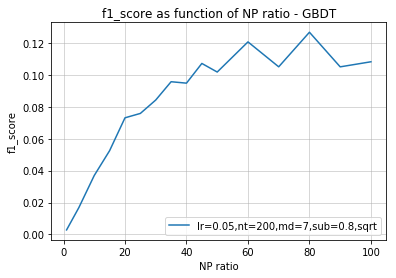

In [40]:
# plot the result
f1 = plt.figure(1)
plt.plot(np_ratios, f1_scores, label="lr=0.05,nt=200,md=7,sub=0.8,sqrt")
plt.xlabel('NP ratio')
plt.ylabel('f1_score')
plt.title('f1_score as function of NP ratio - GBDT')
plt.legend(loc=4)
plt.grid(True, linewidth=0.5)
plt.show()

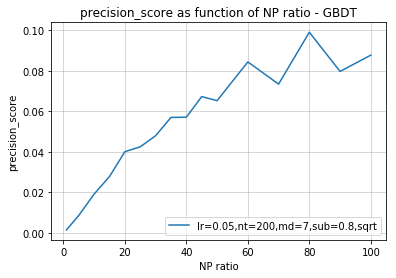

In [41]:
# plot the result
f1 = plt.figure(1)
plt.plot(np_ratios, precision_score, label="lr=0.05,nt=200,md=7,sub=0.8,sqrt")
plt.xlabel('NP ratio')
plt.ylabel('precision_score')
plt.title('precision_score as function of NP ratio - GBDT')
plt.legend(loc=4)
plt.grid(True, linewidth=0.5)
plt.show()

No handles with labels found to put in legend.


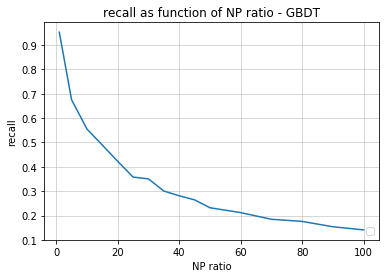

In [42]:
# plot the result
f1 = plt.figure(1)
plt.plot(np_ratios, recall)
plt.xlabel('NP ratio')
plt.ylabel('recall')
plt.title('recall as function of NP ratio - GBDT')
plt.legend(loc=4)
plt.grid(True, linewidth=0.5)
plt.show()

/Users/sangyongjia/anaconda3/lib/python3.7/site-packages/pandas/io/parsers.py:678: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


train_data_set_uiclfc_np shape: (386054, 142) np_ratio: 80
train data label=1: (4654, 142)
train data label=0: (381400, 142)


/Users/sangyongjia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/sangyongjia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/sangyongjia/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus

valid_data_set_uiclfc  shape: (635763, 142)
valid data label=1: (466, 142)
valid data label=0: (635297, 142)
train and valid data is generated.
      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.1132           0.0132           11.58s
         2           0.1100           0.0037           10.20s
         3           0.1084           0.0025            9.20s
         4           0.1046           0.0023            7.92s
         5           0.1019           0.0017            6.53s
         6           0.1006           0.0016            5.27s
         7           0.0986           0.0014            3.96s
         8           0.0963           0.0013            2.64s
         9           0.0937           0.0010            1.33s
        10           0.0932           0.0009            0.00s
GBDT_clf [lr = 0.05, nt = 10] is fitted
time used 17 s
      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.1112           0.0161           

         7           0.0972           0.0014            1.80m
         8           0.0950           0.0013            1.77m
         9           0.0937           0.0011            1.74m
        10           0.0927           0.0009            1.74m
        20           0.0846           0.0003            1.52m
        30           0.0791           0.0002            1.29m
        40           0.0758           0.0001            1.05m
        50           0.0736           0.0001           49.45s
        60           0.0721           0.0000           36.41s
        70           0.0708           0.0000           24.03s
        80           0.0693           0.0000           11.72s
        90           0.0679          -0.0000            0.00s
GBDT_clf [lr = 0.05, nt = 90] is fitted
time used 109 s
      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.1129           0.0156            2.17m
         2           0.1100           0.0030            2.05m
         3   

        50           0.0739           0.0001            5.17m
        60           0.0725           0.0000            4.81m
        70           0.0707           0.0000            4.50m
        80           0.0687           0.0000            4.23m
        90           0.0687          -0.0000            3.95m
       100           0.0676           0.0000            3.69m
       200           0.0608          -0.0000            1.66m
       300           0.0539           0.0000            0.00s
GBDT_clf [lr = 0.05, nt = 300] is fitted
time used 306 s
      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.1131           0.0144            9.93m
         2           0.1098           0.0035            8.76m
         3           0.1056           0.0029            8.79m
         4           0.1036           0.0023            8.97m
         5           0.1016           0.0018            8.68m
         6           0.0983           0.0016            8.51m
         7  

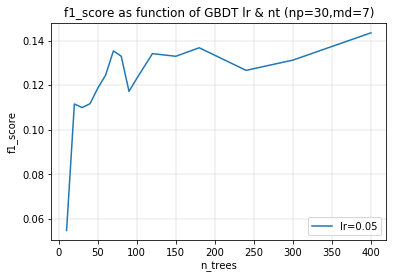

In [46]:
# (2) selection for best n_estimators and learning_rate of GBDT
# training and validating data set generation
valid_X, valid_y, train_X, train_y = valid_train_set_construct(0.1, 80) #30,65,50
learning_rates = []
f1_matrix = []
#[0.05, 0.1, 0.15, 0.2]
#nts = [10,20,30,40,50,60,70,80,90,100,120,150,180,240,300,400]
#nts = [10,20,30,40,50,60,70,80,90,100,120,150,180,240,300,400]
for lr in [0.05,]:
    n_trees = []
    f1_scores = []
    for nt in [10,20,30,40,50,60,70,80,90,100,120,150,180,240,300,400]:
        t1 = time.time()
        # generation of training and valid set
        
        # generation of GBDT model and fit
        modle_gbdt = GradientBoostingClassifier(max_depth=8, 
                                                                  min_samples_leaf=10, 
                                                                  learning_rate=lr, 
                                                                  n_estimators=nt,  
                                                                  subsample=0.8, 
                                                                  max_features="sqrt",
                                                                  verbose=1,
                                                                  n_iter_no_change=None,
                                                                  tol=1e-4)
        
        modle_gbdt.fit(train_X, train_y)
        
        # validation and evaluation
        valid_y_pred = modle_gbdt.predict(valid_X)
        f1_scores.append(metrics.f1_score(valid_y, valid_y_pred))
        n_trees.append(nt)
        
        print('GBDT_clf [lr = %.2f, nt = %d] is fitted' % (lr, nt))
        t2 = time.time() 
        print('time used %d s' % (t2-t1))
        
    f1_matrix.append(f1_scores)
    learning_rates.append(lr)
    
# plot the result
f1 = plt.figure(1)
i = 0
for f1_scores in f1_matrix:
    plt.plot(n_trees, f1_scores, label="lr=%.2f" % learning_rates[i])
    i += 1
    
plt.xlabel('n_trees')
plt.ylabel('f1_score')
plt.title('f1_score as function of GBDT lr & nt (np=30,md=7)')
plt.legend(loc=4)
plt.grid(True, linewidth=0.3)
plt.show()


/Users/sangyongjia/anaconda3/lib/python3.7/site-packages/pandas/io/parsers.py:678: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


train_data_set_uiclfc_np shape: (214266, 142) np_ratio: 80
train data label=1: (2614, 142)
train data label=0: (211652, 142)


/Users/sangyongjia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/sangyongjia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/sangyongjia/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus

valid_data_set_uiclfc  shape: (352982, 142)
valid data label=1: (269, 142)
valid data label=0: (352713, 142)
train and valid data is generated.
      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.1277           0.0028           27.73s
         2           0.1288           0.0009           23.16s
         3           0.1235           0.0051           20.98s
         4           0.1204           0.0034           19.63s
         5           0.1192           0.0018           18.83s
         6           0.1146           0.0026           18.25s
         7           0.1138           0.0018           17.82s
         8           0.1101           0.0020           17.52s
         9           0.1109           0.0017           17.16s
        10           0.1091           0.0005           16.88s
        20           0.1027           0.0004           15.08s
        30           0.1024           0.0003           14.34s
        40           0.0990           0.0002     

         5           0.0991           0.0019            2.18m
         6           0.0966           0.0015            2.25m
         7           0.0943           0.0011            2.27m
         8           0.0918           0.0013            2.24m
         9           0.0911           0.0011            2.23m
        10           0.0897           0.0011            2.22m
        20           0.0787           0.0002            2.03m
        30           0.0731           0.0002            1.85m
        40           0.0690           0.0001            1.72m
        50           0.0667           0.0001            1.56m
        60           0.0644           0.0000            1.41m
        70           0.0610          -0.0000            1.26m
        80           0.0598           0.0000            1.13m
        90           0.0593           0.0000           59.04s
       100           0.0577          -0.0000           52.49s
GBDT_clf [max_depth = 8] is fitted
time used 114 s
      Iter       Tr

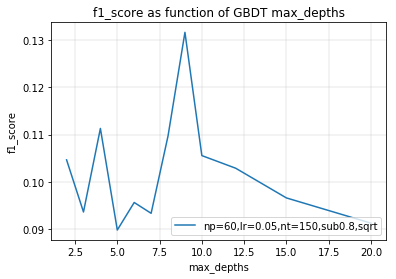

In [38]:
# (3.1) selection for best max_depth of GBDT
# training and validating
valid_X, valid_y, train_X, train_y = valid_train_set_construct(0.1, 80)

max_depths = []
f1_scores = []
for md in [2,3,4,5,6,7,8,9,10,12,15,20]:
    t1 = time.time()
    # generation of training and valid set
    
    # generation of GBDT model and fit
    modle_gbdt = GradientBoostingClassifier(max_depth=md, 
                                                              min_samples_leaf=10, 
                                                              learning_rate=0.05, 
                                                              n_estimators=180,  
                                                              subsample=0.8, 
                                                              max_features="sqrt",
                                                              verbose=True,
                                                              n_iter_no_change=50,
                                                              tol=1e-4)
    modle_gbdt.fit(train_X, train_y)
    
    # validation and evaluation
    valid_y_pred = modle_gbdt.predict(valid_X)
    f1_scores.append(metrics.f1_score(valid_y, valid_y_pred))
    max_depths.append(md)
    print('GBDT_clf [max_depth = %d] is fitted' % md)
    
    t2 = time.time() 
    print('time used %d s' % (t2-t1))
   
# plot the result
f1 = plt.figure(1)
plt.plot(max_depths, f1_scores, label="np=60,lr=0.05,nt=150,sub0.8,sqrt")
plt.xlabel('max_depths')
plt.ylabel('f1_score')
plt.title('f1_score as function of GBDT max_depths')
plt.legend(loc=4)
plt.grid(True, linewidth=0.3)
plt.show()

In [52]:
a = pd.DataFrame(valid_y)

In [53]:
a.shape

(321, 1)

(321, 1)

In [56]:
b =  a[a.label==0]
b.shape

(156, 1)

(156, 1)

In [57]:
b =  a[a.label==1]
b.shape

(165, 1)

(165, 1)

In [49]:
c = pd.DataFrame(train_y)
c.shape

(2619, 1)

(2619, 1)

In [50]:
d = c[c.label==0]
d.shape

(1346, 1)

(1346, 1)

In [51]:
d = c[c.label==1]
d.shape

(1273, 1)

(1273, 1)

In [5]:
 msk_1 = np.random.rand(100) < 0.5

In [6]:
msk_1

array([ True, False, False, False,  True, False,  True,  True, False,
       False,  True, False, False,  True, False, False, False, False,
        True, False, False,  True, False, False, False, False, False,
       False,  True, False,  True, False,  True,  True, False, False,
        True,  True,  True, False,  True, False,  True,  True, False,
        True, False,  True, False, False, False, False,  True,  True,
       False,  True,  True,  True,  True, False, False,  True,  True,
       False,  True, False,  True, False,  True, False,  True,  True,
       False, False,  True,  True,  True, False, False, False,  True,
        True, False,  True,  True,  True, False,  True, False,  True,
        True, False, False,  True,  True, False, False,  True,  True,
       False])